> - Author: lebhoryi@gmail.com
> - Date  : 2020/07/09
> - File  : mnist with tensorflow 2 

# Mnist 实验代码

**实验步骤：**

1. 导入库
2. 准备数据集
3. 搭建神经网络模型
4. 训练
5. 模型保存
6. 加载保存的模型并预测

之前已经将环境安装成功，此步骤可以跳过

uninstall：卸载  
install：安装

In [1]:
# !pip uninstall tensorflow -y
!pip install tensorflow

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/


# 1. 导入库

In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers, datasets, utils
from pathlib import Path
import matplotlib.pyplot as plt

# %matplotlib inline

print(f"The tensorflow version is : {tf.__version__}\n")
print(f"The numpy version is : {np.__version__}")

# 当一个单元格代码写完的时候，点一下上面的Run运行按钮，运行代码

The tensorflow version is : 2.9.1

The numpy version is : 1.23.4


In [2]:
# 在当前路径下创建 model 文件夹，存放模型
# exist_ok 如果文件夹已经存在，不会报错，如果没有，则会创建
model_path = Path("Models")
model_path.mkdir(exist_ok=True) 

# 2. 准备数据集

载入并准备好[ MNIST 数据集](http://yann.lecun.com/exdb/mnist/)。

Ps: 此处的数据集文件存放在国外网站，这里我已经提前下好到 ./data/mnist.npz, 直接使用即可

训练集包含60,000个示例图像，测试集包含10,000个示例图像

In [3]:
data_path = Path("Datasets")
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data(data_path.resolve()/'train_data/mnist.npz')  # resolve 变成绝对路径

print(f"x_train shape : {x_train.shape}")
print(f"y_train shape : {y_train.shape}")

x_train shape : (60000, 28, 28)
y_train shape : (60000,)


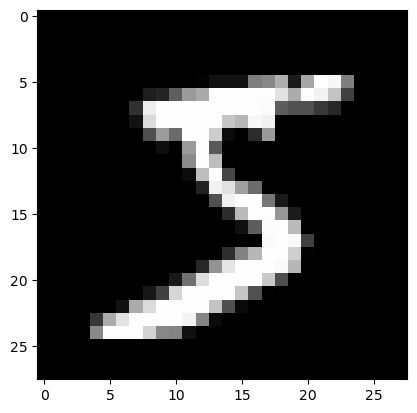

In [4]:
# 显示图片，查看数据是否正常
plt.imshow(x_train[0], cmap='gray')

In [5]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]  =  "TRUE"

In [6]:
# Normalize data，归一化，将图像的像素值都处理到[0,1]范围
x_train, x_test = x_train / 255, x_test / 255
print(f"x_train shape : {x_train.shape}")

# 扩展一个维度，二维卷积需要用的输入数据是 NHWC，分别是number of batch, height, width, channels
x_train, x_test = tf.expand_dims(x_train, -1), tf.expand_dims(x_test, -1)
print(f"add dim x_train shape : {x_train.shape}")

x_train shape : (60000, 28, 28)
add dim x_train shape : (60000, 28, 28, 1)


# 3. 搭建神经网络模型

下面的是 tensorflow 官方例程，*此处不应用*

```python
# build network
tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

model.summary()
```


In [7]:
# build network
tf.keras.backend.clear_session()

model = models.Sequential()
# conv1
model.add(layers.Conv2D(input_shape=(28, 28, 1), filters=4, 
    kernel_size=(3, 3), activation='relu', name='conv1'))
model.add(layers.MaxPool2D(pool_size=(2,2), name='pool1'))

# conv2
model.add(layers.Conv2D(filters=8, kernel_size=(3, 3), 
                        activation='relu', name='conv2'))
model.add(layers.MaxPool2D(pool_size=(2,2), name='pool2'))

# flattern
# model.add(layers.Dropout(rate=0.5, name='dropout'))
model.add(layers.Flatten(name='flatten'))

# FC1
model.add(layers.Dense(128, activation='relu', name='FC1'))

# FC2
model.add(layers.Dense(10, activation='softmax', name="FC2"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 26, 26, 4)         40        
                                                                 
 pool1 (MaxPooling2D)        (None, 13, 13, 4)         0         
                                                                 
 conv2 (Conv2D)              (None, 11, 11, 8)         296       
                                                                 
 pool2 (MaxPooling2D)        (None, 5, 5, 8)           0         
                                                                 
 flatten (Flatten)           (None, 200)               0         
                                                                 
 FC1 (Dense)                 (None, 128)               25728     
                                                                 
 FC2 (Dense)                 (None, 10)                1

# 4. 训练

### `compile()` 方法：指定损失、指标和优化器

要使用 `fit()` 训练模型，您需要指定损失函数、优化器以及一些要监视的指标（可选）。

将它们作为 `compile()` 方法的参数传递给模型：

In [8]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy',])
history = model.fit(x_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 23s 48ms/step - loss: 0.4204 - accuracy: 0.8813
Epoch 2/10
469/469 [==============================] - 22s 48ms/step - loss: 0.1155 - accuracy: 0.9645
Epoch 3/10
469/469 [==============================] - 22s 48ms/step - loss: 0.0862 - accuracy: 0.9733
Epoch 4/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0712 - accuracy: 0.9778
Epoch 5/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0613 - accuracy: 0.9816
Epoch 6/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0539 - accuracy: 0.9835
Epoch 7/10
469/469 [==============================] - 23s 48ms/step - loss: 0.0479 - accuracy: 0.9853
Epoch 8/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0426 - accuracy: 0.9869
Epoch 9/10
469/469 [==============================] - 23s 48ms/step - loss: 0.0376 - accuracy: 0.9884
Epoch 10/10
469/469 [==============================] - 23s 48ms/step - loss: 0.033

In [9]:
# 返回的“历史”对象保留训练期间的损失值和指标值记录
history.history

{'loss': [0.42040395736694336,
  0.11553570628166199,
  0.08621733635663986,
  0.07119801640510559,
  0.06133239343762398,
  0.05385502427816391,
  0.04788361117243767,
  0.04255673289299011,
  0.03762427717447281,
  0.03328118473291397],
 'accuracy': [0.8813333511352539,
  0.9645333290100098,
  0.9732833504676819,
  0.9778000116348267,
  0.9816499948501587,
  0.9835333228111267,
  0.9852666854858398,
  0.9868666529655457,
  0.9884166717529297,
  0.9901666641235352]}

In [10]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
313/313 [==============================] - 1s 2ms/step - loss: 0.0466 - accuracy: 0.9853
test loss, test acc: [0.046647898852825165, 0.9853000044822693]


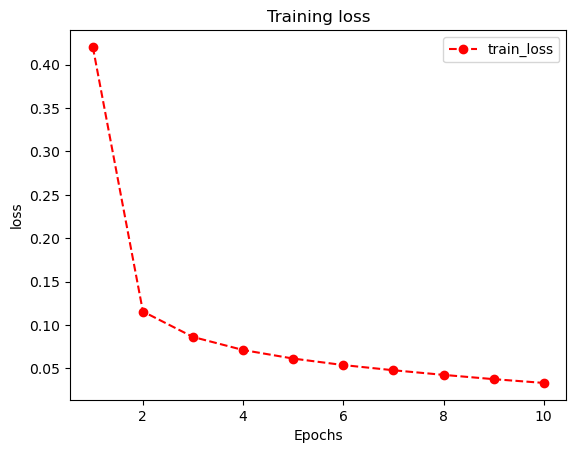

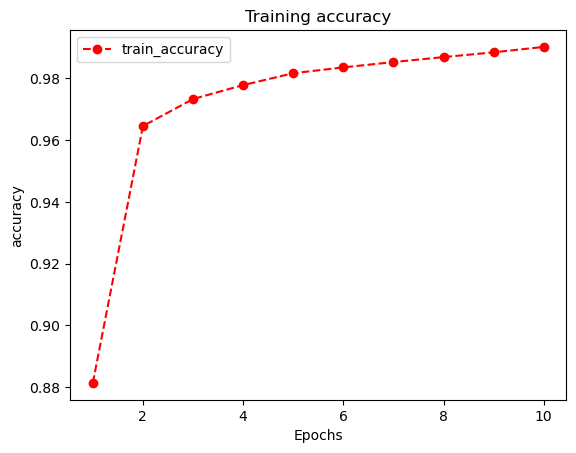

In [11]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    epochs =range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'ro--')
    # 相关属性
    plt.title('Training ' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend(['train_'+metric])
    plt.show()
    
plot_metric(history, 'loss')
plot_metric(history, 'accuracy')

**模型预测**

验证 model 是否成功训练，用 test 数据集进行推理

In [ ]:
for img in x_test[10:16]:
    y_pred = model.predict(tf.expand_dims(img, axis=0))  # 模型推理
    p = np.argmax(y_pred)  # 获取概率最高的元素的索引
    plt.imshow(img, cmap="gray")
    plt.show()
    print(f"model inference ouput:\n {y_pred}")
    print(f"predict : {p}")

## 5. 模型保存

In [ ]:
keras_file = model_path/'mnist.h5'
print(keras_file)
model.save(keras_file, save_format="h5")

## 6. 加载保存的模型并预测

In [ ]:
# load model and test
model_restore = models.load_model(keras_file)

# 验证模型，没有任何返回则模型加载成功
np.testing.assert_allclose(model.predict(x_test), model_restore.predict(x_test))

In [ ]:
model_restore.summary()

In [ ]:
# 找五张图片做测试
for test_image in x_test[:5]:
    y_pred = model_restore.predict(tf.expand_dims(test_image, axis=0))
    p = np.argmax(y_pred)    # 获取概率最高的元素的索引
    plt.imshow(test_image, cmap="gray")
    plt.show()
    print(f"model inference ouput:\n {y_pred}")
    print(f"predict : {p}")

In [ ]:
# keras 模型转 tflite，后者模型会更小一点，算子支持更多
model = tf.keras.models.load_model(keras_file)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_file = model_path/ "mnist.tflite"
tflite_file.write_bytes(tflite_model)